In [10]:
#LOADING DATASET
import pandas as pd

df = pd.read_csv("C:\\Users\\WATSON ELECTRONCS\\Desktop\\market_prices.csv")

df.head()


,commodity,market,month,season,supply_level,price_per_kg_tzs
0,Potatoes,Dodoma,11,Harvest,High,1571.0
1,Beans,Arusha,8,Mid,Medium,3342.0
2,Beans,Dodoma,2,Harvest,High,3058.0
3,Potatoes,Dodoma,1,Harvest,High,1518.0
4,Tomatoes,Mbeya,9,Mid,Medium,2163.0


In [11]:
#LOOKING FOR DATA INFO 
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   commodity         250 non-null    object 
 1   market            250 non-null    object 
 2   month             250 non-null    int64  
 3   season            238 non-null    object 
 4   supply_level      250 non-null    object 
 5   price_per_kg_tzs  238 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 11.8+ KB


,month,price_per_kg_tzs
count,250.000000,238.000000
mean,6.448000,2029.823529
std,3.492864,726.378482
min,1.000000,935.000000
25%,3.250000,1342.500000
50%,6.000000,1975.000000
75%,9.000000,2642.500000
max,12.000000,3393.000000


In [12]:
#LOOKING FOR MISSING VALUES IN THE DATASET
df.isnull().sum()
#FILLING THE MISSING VALUES
df['price_per_kg_tzs'].fillna(df['price_per_kg_tzs'].median(), inplace=True)
df['month'].fillna(df['month'].median(), inplace=True)




C:\Users\WATSON ELECTRONCS\AppData\Local\Temp\ipykernel_4216\178858339.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_per_kg_tzs'].fillna(df['price_per_kg_tzs'].median(), inplace=True)
C:\Users\WATSON ELECTRONCS\AppData\Local\Temp\ipykernel_4216\178858339.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [14]:
df.head(30)

,commodity,market,month,season,supply_level,price_per_kg_tzs
0,Potatoes,Dodoma,11,Harvest,High,1571.0
1,Beans,Arusha,8,Mid,Medium,3342.0
2,Beans,Dodoma,2,Harvest,High,3058.0
3,Potatoes,Dodoma,1,Harvest,High,1518.0
4,Tomatoes,Mbeya,9,Mid,Medium,2163.0
5,Potatoes,Mbeya,3,Harvest,High,1271.0
6,Potatoes,Dar es Salaam,3,Harvest,High,1975.0
7,Rice,Mbeya,9,Mid,Low,2666.0
8,Rice,Mwanza,9,Mid,Low,2656.0
9,Beans,Dar es Salaam,4,NaN,Low,1975.0


In [17]:
#CHANGING CATEGORICAL FEATURES TO BE NUMBERS
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['commodity'] = le.fit_transform(df['commodity'])
df['market'] = le.fit_transform(df['market'])
df['season'] = le.fit_transform(df['season'])
df['supply_level'] = le.fit_transform(df['supply_level'])
df.head()


,commodity,market,month,season,supply_level,price_per_kg_tzs
0,2,2,11,0,0,1571.0
1,0,0,8,2,2,3342.0
2,0,2,2,0,0,3058.0
3,2,2,1,0,0,1518.0
4,4,3,9,2,2,2163.0


In [19]:
#TRAINIG AND TEST SPLIT
X = df.drop('price_per_kg_tzs', axis=1)
y = df['price_per_kg_tzs']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

#DECISION TREE
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)



DecisionTreeRegressor()

In [20]:
#MODEL EVALUATION
from sklearn.metrics import mean_absolute_error, r2_score
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
print("Linear Regression R2:", r2_score(y_test, lr_pred))
print("Decision Tree R2:", r2_score(y_test, dt_pred))


Linear Regression R2: 0.025433841918308664
Decision Tree R2: 0.6531704763135313


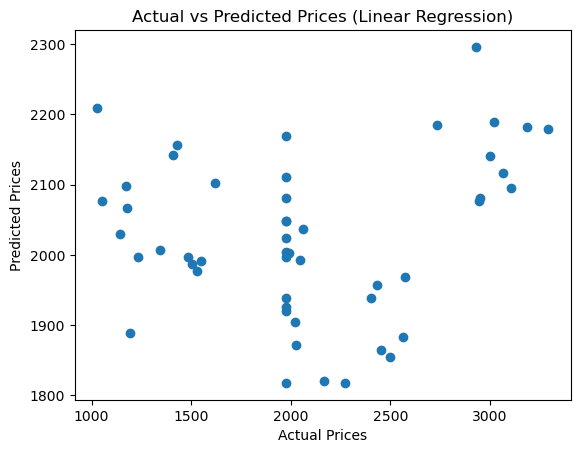

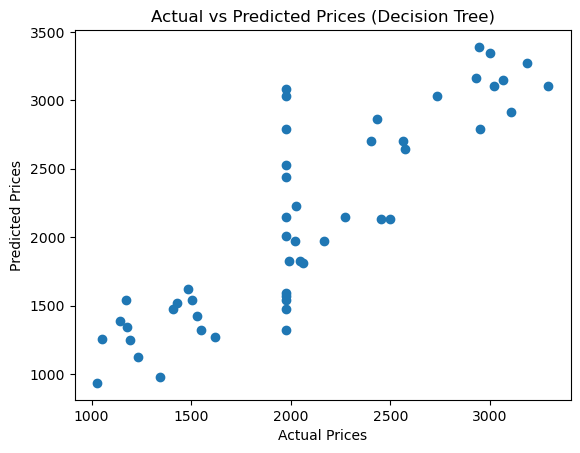

In [22]:
#GRAPH SHOWING THE VARIATION BETWEEN THE ACTUAL VALUES AND PREDICTED VALUES
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(y_test, lr_pred)
#ACTUAL VS PREDICTED(LINEAR REGRESSION)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.show()
#ACTUAL VS PREDICTED (DECISION TREE)
plt.figure()
plt.scatter(y_test, dt_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Decision Tree)")
plt.show()



In [23]:
#PICKING THE BEST MODEL
import pickle
pickle.dump(dt, open("model.pkl", "wb"))
pickle.dump(le, open("encoder.pkl", "wb"))
